# *`03_Gradient Descent and it's Variants`*

## What is Gradient Descent?
Gradient descent is a mathematical optimization algorithm that is often used to train machine learning models and neural networks. It is a first-order iterative algorithm for finding a local minimum of a differentiable function.

The idea is to take repeated steps in the opposite direction of the gradient of the function at the current point, because this is the direction of the steepest descent.

* It is an optimization technique to which you provide a differentiable function.
* The function should be differentiable at every point.

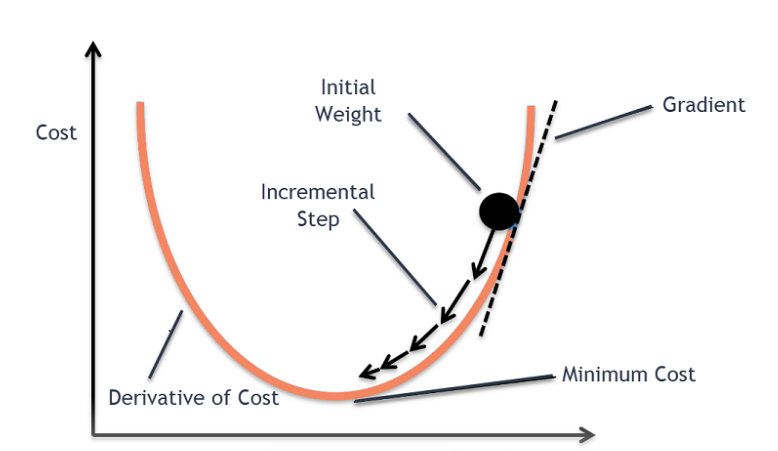

* image source [check here](https://www.analyticsvidhya.com/blog/2020/10/how-does-the-gradient-descent-algorithm-work-in-machine-learning/)

\
\
**INTUITION:**

Let's try to get an intuition from the eyes of Linear Regression. Consider the data below:

\
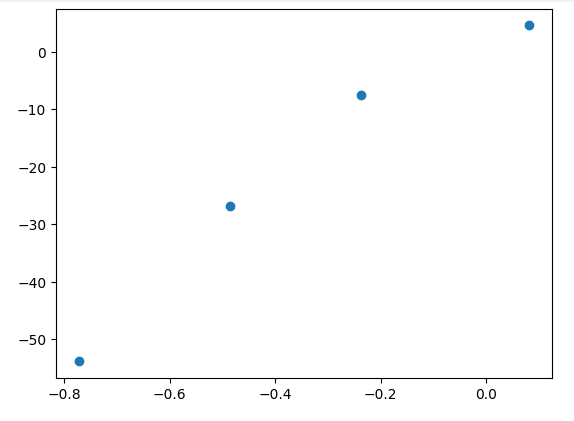

We are trying to fit a line which minimizes the loss for us. i.e. we aim to minimize the distance between $y_{true}$  and  $y_{hat}$ where, $y_{hat}$ is given by:

$y_{hat_i} = m x_i + b$              ...... (1)   

and the loss function used in linear regression is Mean Squarred error stated as follows:

$$
L = \sum_{i=1}^{n} (y_i - y_{hat_i})^2
$$
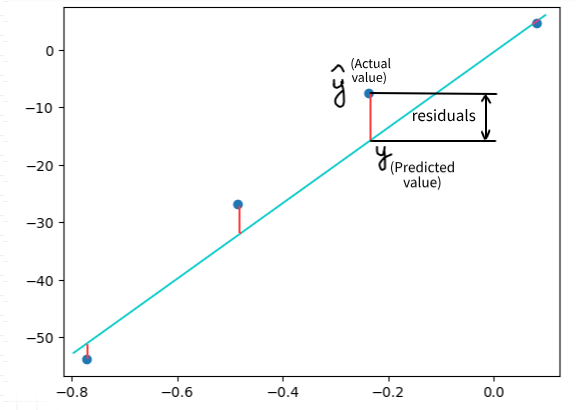


\
\
If we put eq $(1)$ in our loss function it becomes a function of $m$ and $b$:
$$
L_{(m,b)} = \sum_{i=1}^{n} (y_i - m * x_i + b)^2
$$

You have a function with two tuning knobs $m$ and $b$.
* If you change $m$, the line rotates in clockwise or anticlockwise direction.
* If you change $b$, the line moves up and down.

To simplify the discussion, let's say for our data we have $m$ = 3.8. Then $L$ just remains a function of $b$.
$$
L_{(b)} = \sum_{i=1}^{4} (y_i - 3.8 * x_i + b)^2
$$

You have the direction of your line $m$ and now want to find the height of the line. Thats basically the minima of the loss function:

\
\
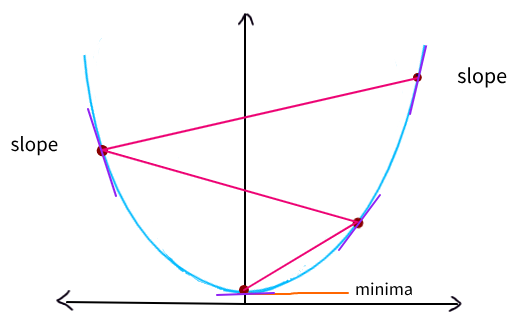

\


1. You start at a random point $b$ is initialized randomly.

2. The way to moves further is that the algorithm calculates the slope at each point. You draw a tangent at each point and the direction of the slope will tell the algorithm whether to move forward or backward.
> If the slope is **`-ve`**: Then move forward. Increment the value of $b$ by slope.\
> If the slope is **`+ve`**: Then go backward. Decrement the value of $b$ by slope.


Formulated as:

$$
b_{new} = b_{old} - slope
$$

The change caused in $b$ due to above formula is quite drastic thats because a higher value of slope will lead to a higher step size. We would want to move ahead gradually therefore, we introduce a learning factor $\eta$.

$$
b_{new} = b_{old} - \eta * slope
$$

You keep updating the $b$ until convergence.

**When to stop ?**

If $b_{new} - b_{old}$ is same or very small like ~ 0.0001. It means you have converged to the solution.

\

**Algorithm:**

Let's write the algorithm:

1. Initialize random value for $m$ and $b$.

  $m = 1$ and $b = 0$

2. Set the number of epochs and the learning rate

  $epcochs = 100$ and $lr = 0.001$

3. for $i$ in $epochs$:

>>    $b = b - \eta * slope$
\
>>    $m = m - \eta * slope$


* $change_{(slope_b)}$ for calculating $b$ by keeping $m$ constant is :

$$
change_{(slope_b)} = \sum_{i=1}^{n} -2 (y_i - m * x_i - b)
$$

* $change_{(slope_m)}$ for calculating $m$ by keeping $b$ constant is :

$$
change_{(slope_m)} = \sum_{i=1}^{n} -2 (y_i - m * x_i - b) x_i
$$

Let's write the code for the algorithm.

In [11]:
import random
class GradientDescentRegressor:
    # Initialize the values of slope and intercept randomly
    def __init__(self,learning_rate,epochs):
        self.slope_ = random.randint(-100, 100)
        self.intercept_ = random.randint(-100, 100)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, x, y):

        # Calculate change in slope using gradient descent for both slope and intercept
        for _ in range(self.epochs):

            change_in_slope_b = -2 * np.sum(y - (self.slope_ * x.ravel()) - self.intercept_)
            change_in_slope_m = -2 * np.sum((y - (self.slope_ * x.ravel()) - self.intercept_) * x.ravel())

            self.slope_ = self.intercept_ - (self.learning_rate * change_in_slope_b)
            self.intercept_ = self.slope_ - (self.learning_rate * change_in_slope_m)

        print(self.slope_,self.intercept_)

    def predict(self, x):
        return self.slope_ * x + self.intercept_

In [9]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

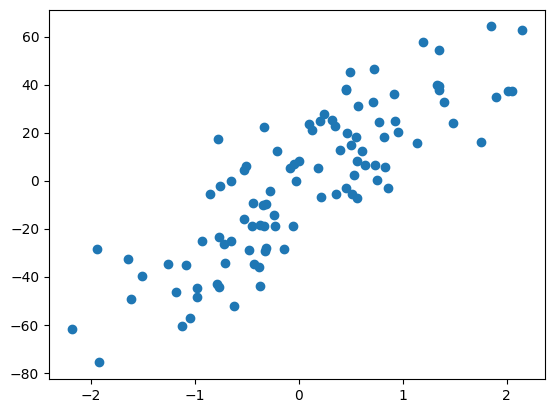

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [6]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661012

In [13]:
GDR = GradientDescentRegressor(0.001,50)
GDR.fit(X_train,y_train)

11.303587077935585 13.726939850732244


In [14]:
y_pred = GDR.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.06542162487929315